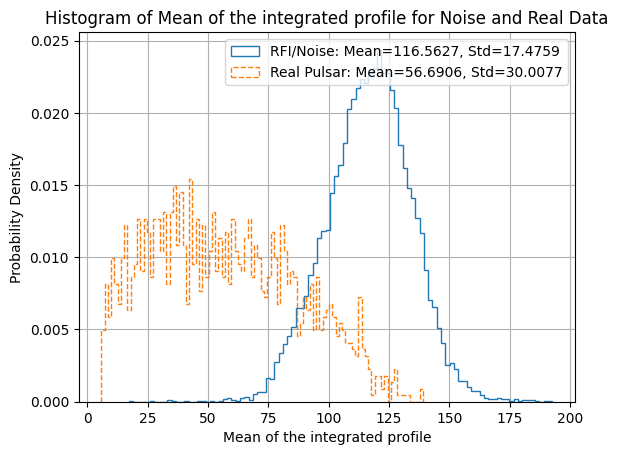

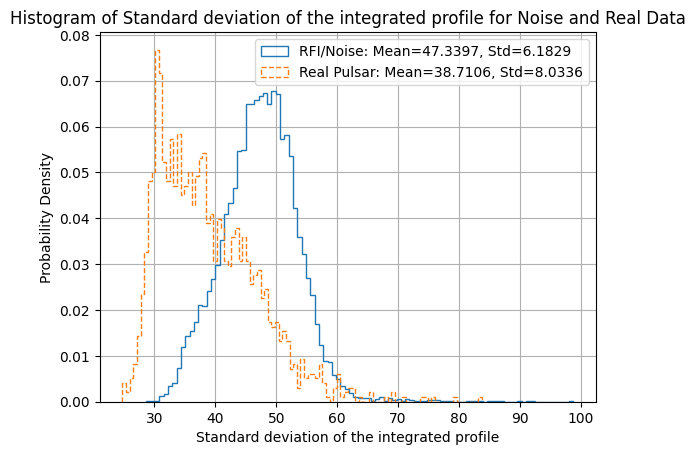

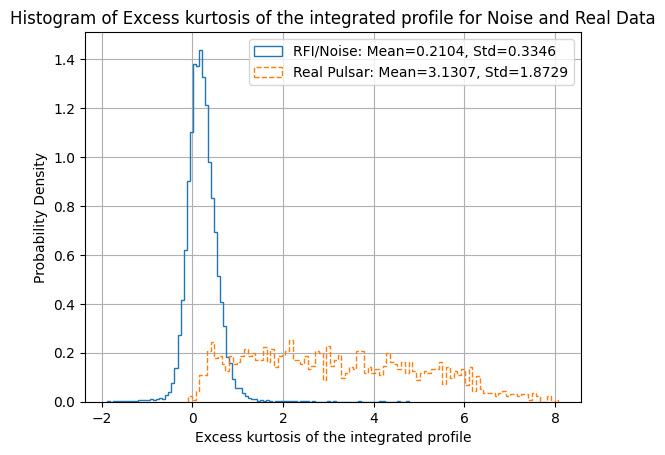

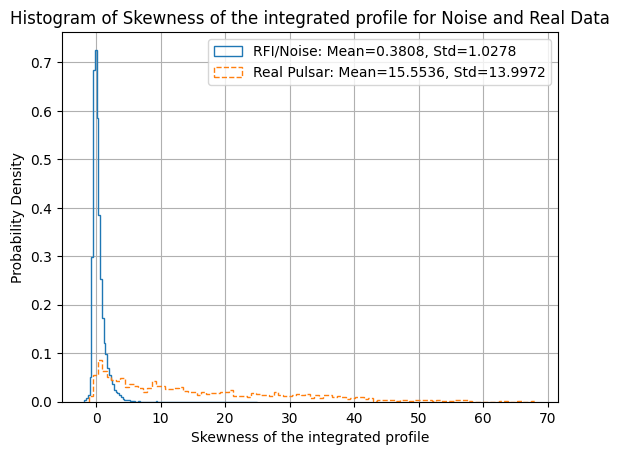

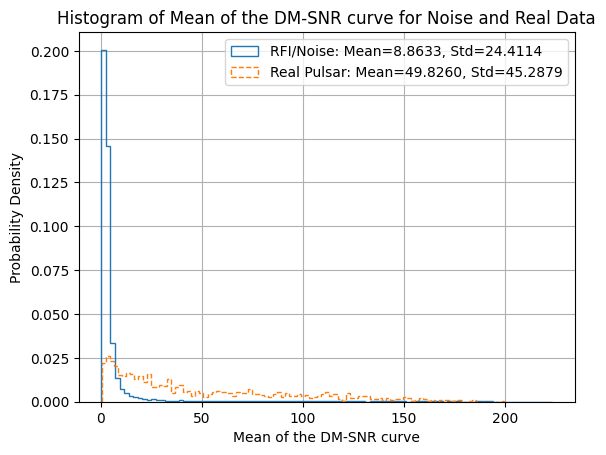

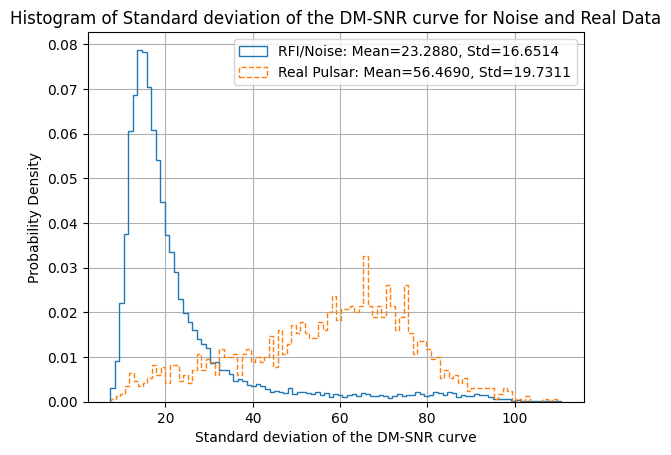

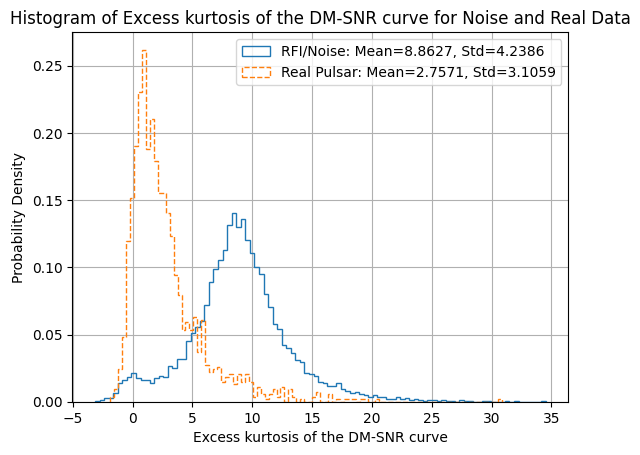

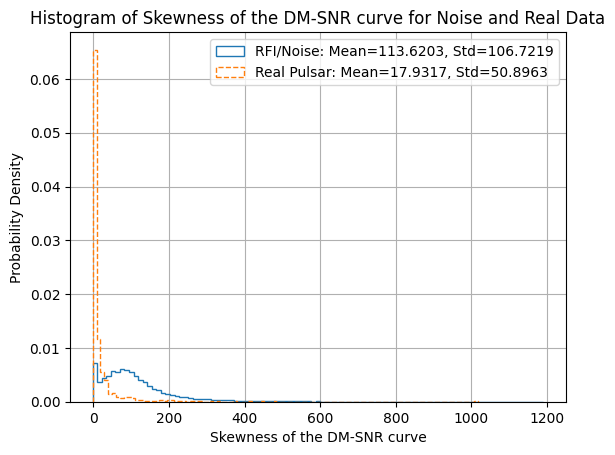

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

#Indexes 0 through 3 are for the integrated profile
#Indexes 4 through 7 are for the DM-SNR curve

df = pd.read_csv("HTRU_2.csv", header=None)
columnLabels = ("Mean of the integrated profile",
    "Standard deviation of the integrated profile",
    "Excess kurtosis of the integrated profile",
    "Skewness of the integrated profile",
    "Mean of the DM-SNR curve",
    "Standard deviation of the DM-SNR curve",
    "Excess kurtosis of the DM-SNR curve",
    "Skewness of the DM-SNR curve",
    "Class")
groupNames=("RFI/Noise","Real Pulsar")
groupLinestyle=("-","--")
df.columns=columnLabels
by_class = df.groupby("Class")
#From now on, IP = integrated profile
for l in columnLabels[:-1]:
    #Getting all groups, in this case just 0 & 1
    for g in by_class.groups.keys():
        mean=by_class.get_group(g)[l].mean()
        std=by_class.get_group(g)[l].std()
        plt.hist(by_class.get_group(g)[l],label=f'{groupNames[g]}: Mean={mean:.4f}, Std={std:.4f}',bins=99,density=True,linestyle=groupLinestyle[g],histtype='step')
    plt.legend()
    plt.xlabel(l)
    plt.ylabel('Probability Density')
    plt.grid()
    plt.title(f'Histogram of {l} for Noise and Real Data')
    plt.show()

In [10]:
#Probabilities
print(f'Probability that an observation is a pulsar candidate is {len(by_class.get_group(1))/len(df)*100:.4f}%')
#Filter function, where lambda is a drop in function. Passes every value through & returns true/false. List evaluates filter
numobs=len(list(filter(lambda x:x<80,df["Mean of the integrated profile"])))
print(f'Probability that an observation w/ a mean of an integrated profile less than 80 is {numobs/len(df)*100:.4f}%')
numobspulsar=len(list(filter(lambda x:x<80,by_class.get_group(1)["Mean of the integrated profile"])))
print(f'Probability that a real pulsar observation w/ a mean of an integrated profile less than 80 is {numobspulsar/len(df)*100:.4f}%')

Probability that an observation is a pulsar candidate is 9.1574%
Probability that an observation w/ a mean of an integrated profile less than 80 is 8.6267%
Probability that a real pulsar observation w/ a mean of an integrated profile less than 80 is 6.9002%


In [11]:
#Bayes' Equation
from IPython.display import display, Math, Latex
display(Math(r'P(A|B)=\frac{P(A\cap B)}{P(B)}'))
print(f'For an observation w/ mean of the integrated profile < 80, the probability that it is a pulsar candidate is {(numobspulsar/len(df))/(numobs/len(df))*100:.4f}%')
#When swapped, we simply replace the denominator w/ P(A)
print(f'For an observation that is a pulsar candidate, the probability that it is an observation w/ mean of the integrated profile < 80 is {(numobspulsar/len(df))/(len(by_class.get_group(1))/len(df))*100:.4f}%')

<IPython.core.display.Math object>

For an observation w/ mean of the integrated profile < 80, the probability that it is a pulsar candidate is 79.9870%
For an observation that is a pulsar candidate, the probability that it is an observation w/ mean of the integrated profile < 80 is 75.3508%


In [11]:
#Standard normal distribution
from scipy.stats import norm
cpm = [norm.cdf(1)-norm.cdf(0),norm.cdf(3)-norm.cdf(0),norm.cdf(5)-norm.cdf(0)]
print(f'Cumulative probabilities from mean for Z = 1, 3, & 5 respectively =', [*map(lambda x:f'{x:.4f}',cpm)])
cp = [norm.cdf(1),norm.cdf(3),norm.cdf(5)]
print(f'Cumulative probabilities for Z = 1, 3, & 5 respectively =', [*map(lambda x:f'{x:.4f}',cp)])
ccp = [1-cp[0],1-cp[1],1-cp[2]]
print(f'Complementary cumulative probabilities for Z = 1, 3, & 5 respectively =', [*map(lambda x:f'{x:.4f}',ccp)])
#p-value statistics
print(f'p-value of the Z-score 5.9 is {1 - norm.cdf(5.9):.4e}')

Cumulative probabilities from mean for Z = 1, 3, & 5 respectively = ['0.3413', '0.4987', '0.5000']
Cumulative probabilities for Z = 1, 3, & 5 respectively = ['0.8413', '0.9987', '1.0000']
Complementary cumulative probabilities for Z = 1, 3, & 5 respectively = ['0.1587', '0.0013', '0.0000']
p-value of the Z-score 5.9 is 1.8175e-09
